In [47]:
import numpy as np
np.random.seed(2023 - 6 - 1)
import pandas as pd
import matplotlib.pyplot as plt

# ___Understanding Confidence Intervals___
---------------

In [2]:
evdata = pd.read_csv("../data/EV_Population_Data.csv")

In [3]:
evdata.shape

(130443, 3)

In [4]:
# evdata has a sample of 130443 electric vehicles registered in USA.
# This sample is not truly representative of the world, or even the US.

In [6]:
# Unlike in the previous exercise, where we considered this dataset to be the population, here we'll consider the dataset as a sample of 
# al EVs in the USA.

In [8]:
evdata.Make.unique()

array(['TESLA', 'HONDA', 'NISSAN', 'FORD', 'AUDI', 'KIA', 'CHEVROLET',
       'SMART', 'BMW', 'TOYOTA', 'JEEP', 'FIAT', 'VOLVO', 'CHRYSLER',
       'LEXUS', 'PORSCHE', 'CADILLAC', 'HYUNDAI', 'MERCEDES-BENZ',
       'RIVIAN', 'VOLKSWAGEN', 'JAGUAR', 'LINCOLN', 'MITSUBISHI', 'MINI',
       'POLESTAR', 'GENESIS', 'SUBARU', 'LUCID', 'TH!NK', 'LAND ROVER',
       'FISKER', 'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'BENTLEY'],
      dtype=object)

In [16]:
# Let's calculate the proportion of Teslas among the EVs in the sample

sample_size = evdata.shape[0]
tesla = (evdata.Make == "TESLA").mean()
tesla

0.4571268676740032

In [18]:
# With 95% confidence we could say that the proportion of Teslas among all the EVs in the USA is between

min_lim = tesla - (1.96 * np.sqrt(tesla * (1 - tesla) / sample_size))
max_lim = tesla + (1.96 * np.sqrt(tesla * (1 - tesla) / sample_size))

In [22]:
print(f"{min_lim * 100:.5f}% & {max_lim * 100:.5f}%")

45.44234% & 45.98303%


In [24]:
# Our sample size is

print(f"{evdata.shape[0]:,}")

130,443


## ___What do we make a confidence interval for?___
--------------

In [25]:
# We make a confidence interval for a parameter, not a statistic.

# We'd claim our estimates form the confidence interval for the POPULATION PROPORTION of Teslas among all the EVs in USA.
# We do use our sample to compute this, but we do not specify as the proportion of our sample!

# We propose a metric for the population with a certain confidence using an available sample.

## ___What does the phrase "with 95% confidence" really mean?___
--------------

In [27]:
# Does this confidence interval covers all the data in our SAMPLE?

In [28]:
min_lim, max_lim

(0.45442344949317337, 0.459830285854833)

In [30]:
# Yes, because we centred this interval around the sample metric, allowing flanks on either sides.
# So, of course, the sample metric will surely fall inside this range.

# Will the population metric be covered by this interval?
# i.e Will the proportion of Teslas among all EVs in USA be in the proposed range?

# The answer is WE DO NOT KNOW!
# In order to make such a claim, we must know the population metric, bu WE DO NOT.
# That is the reason why we designed a sampling study, to study a representative sample in order to make sense of the population.

-------------------
## __The impression 95% confidence interval means that there is a 95% chance that the population metric will fall inside interval is INCORRECT.__
-------------------

In [31]:
# Confidence intervals are not based on probabilities.

## ___n% Confidence &rarr; We have n% confidence in the process used to evaluate the confidence interval.___ 

In [32]:
# Let's examine this again.
# We'll use the same dataset, but this time we'll treat the dataset as the population!

In [35]:
# Proportion of Teslas among all EVs in USA
# population -> all EVs in USA

population_prop = (evdata.Make == "TESLA").mean()
population_prop

0.4571268676740032

In [36]:
evdata.shape[0]

130443

In [38]:
# Let's take 1,000 samples, each with size 1,000
HLIM = evdata.shape[0]
sample_props = []

for i in range(1000):
    sample_props.append((evdata.Make[np.random.randint(low = 0, high = HLIM, size = 1000)] == "TESLA").mean())

In [40]:
sample_props[:10]

[0.46, 0.467, 0.47, 0.431, 0.46, 0.412, 0.473, 0.459, 0.481, 0.448]

In [50]:
# Create a confidence interval for each proportion =>
# In the format => (sample_proportion, lower_limit, upper_limit)

conf_intervals = []

for props in sample_props:
    conf_intervals.append((props,
                           props - (1.96 * np.sqrt(props * (1 - props) / 1000)),
                           props + (1.96 * np.sqrt(props * (1 - props) / 1000))))

conf_intervals = np.array(conf_intervals)

In [51]:
conf_intervals[:10]

array([[0.46      , 0.42910901, 0.49089099],
       [0.467     , 0.43607725, 0.49792275],
       [0.47      , 0.43906551, 0.50093449],
       [0.431     , 0.40030619, 0.46169381],
       [0.46      , 0.42910901, 0.49089099],
       [0.412     , 0.38149343, 0.44250657],
       [0.473     , 0.4420549 , 0.5039451 ],
       [0.459     , 0.42811404, 0.48988596],
       [0.481     , 0.45003206, 0.51196794],
       [0.448     , 0.41717773, 0.47882227]])

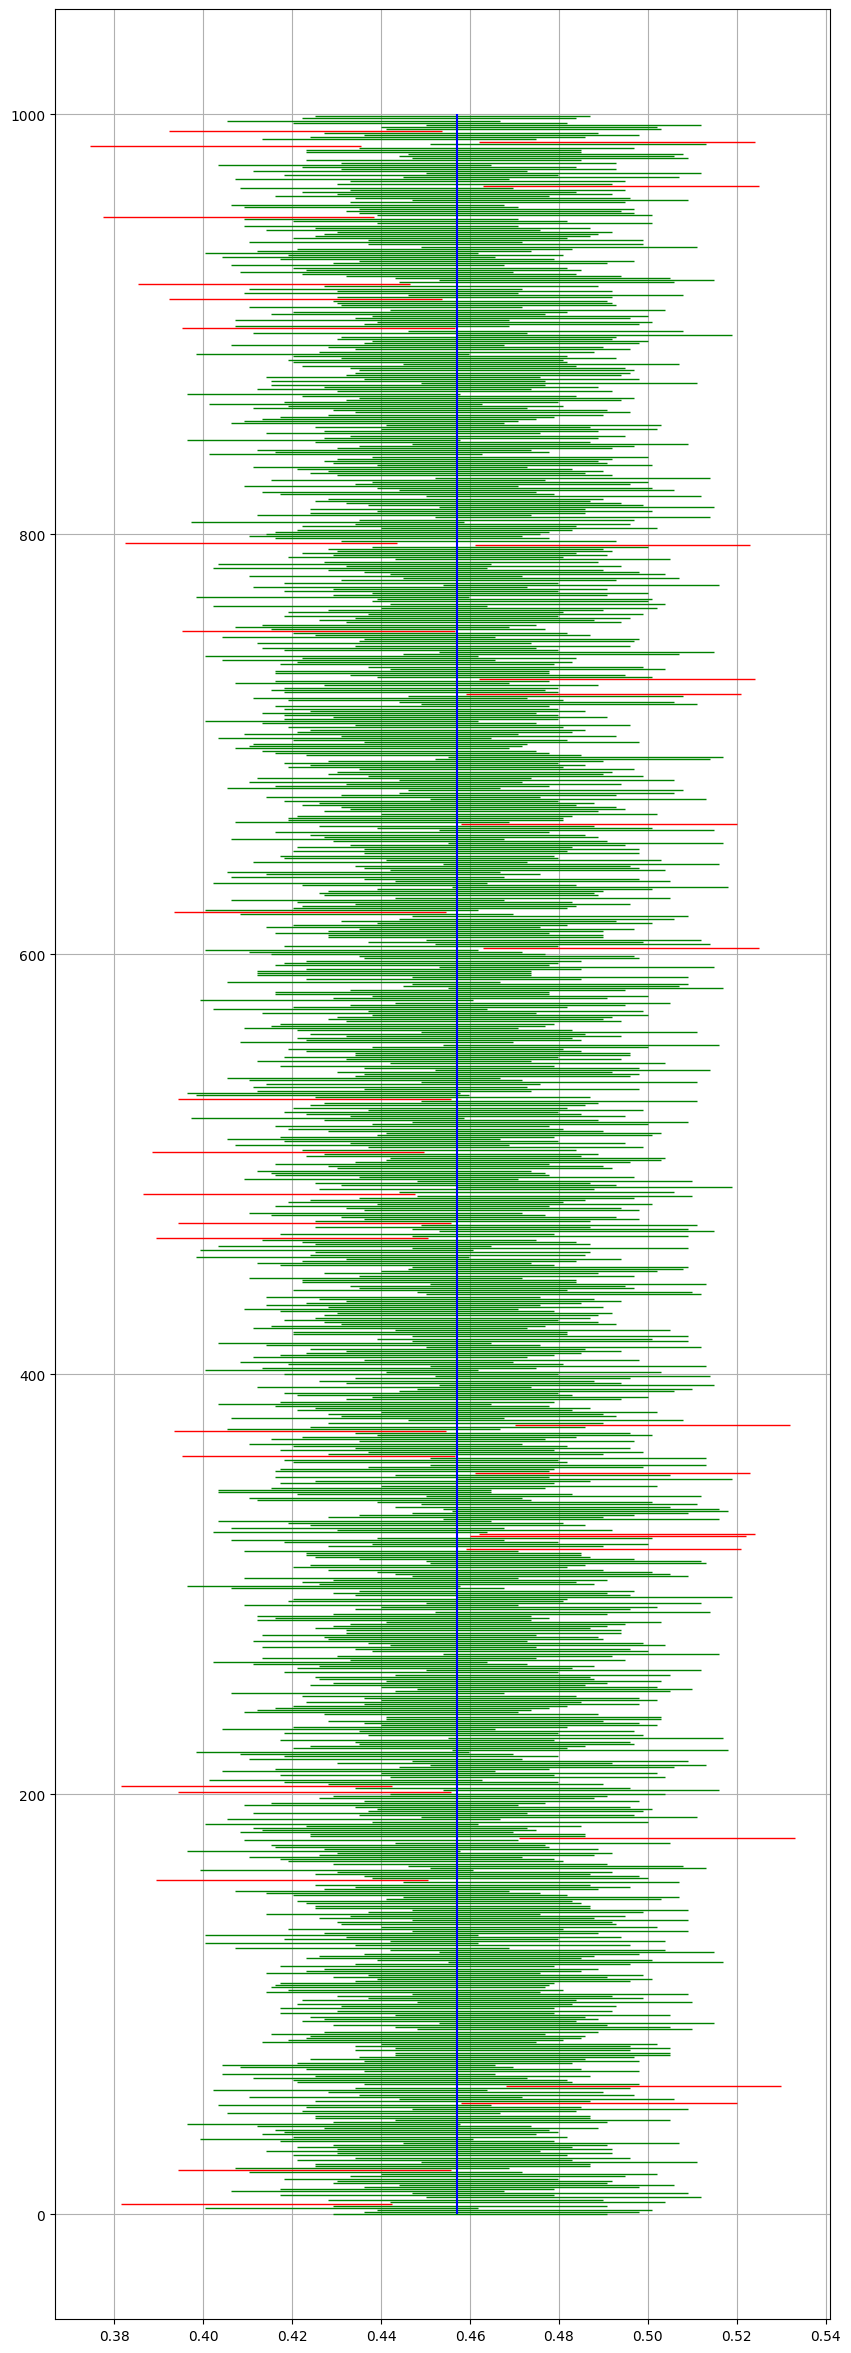

In [64]:
# Let's visualize this.
n_sample_confidence_intervals_that_didnt_cover_population_proportion = 0

fig, axes = plt.subplots()
fig.set_size_inches(10, 30)
for (i, cnfd) in enumerate(conf_intervals):
    if (population_prop < cnfd[2]) and (population_prop > cnfd[1]):
        axes.hlines(y = i, xmin = cnfd[1], xmax = cnfd[2], color = "green", linewidth = 1)
    else:
        n_sample_confidence_intervals_that_didnt_cover_population_proportion += 1
        axes.hlines(y = i, xmin = cnfd[1], xmax = cnfd[2], color = "red", linewidth = 1)
    # axes.scatter(x = cnfd[0], y = i, color = "black", s = 2)
axes.vlines(x = population_prop, ymin = 0, ymax = 1000, color = "blue")
axes.grid()
plt.show()

In [66]:
# Out of the 1000 confidence intervals generated from samples

n_sample_confidence_intervals_that_didnt_cover_population_proportion

36

In [67]:
# Did not cover the population metric!

In [68]:
36 / 1000

0.036

In [69]:
# With a 95% confidence => We'd expect at least 95% of the confidence intervals computed using the sample metric will cover the 
# population metric.

In [85]:
print(f"{(1000 - 36) / 1000 * 100:.2f} %")

96.40 %


In [75]:
# However in our real world applications, we won't be sampling 1,000 times.
# We'd use just one sample, and assume with 95% confidence that the metric produced by the sample covers the population metric.

## ___Alternative Multipliers___
-----------

In [ ]:
# 90% confidence

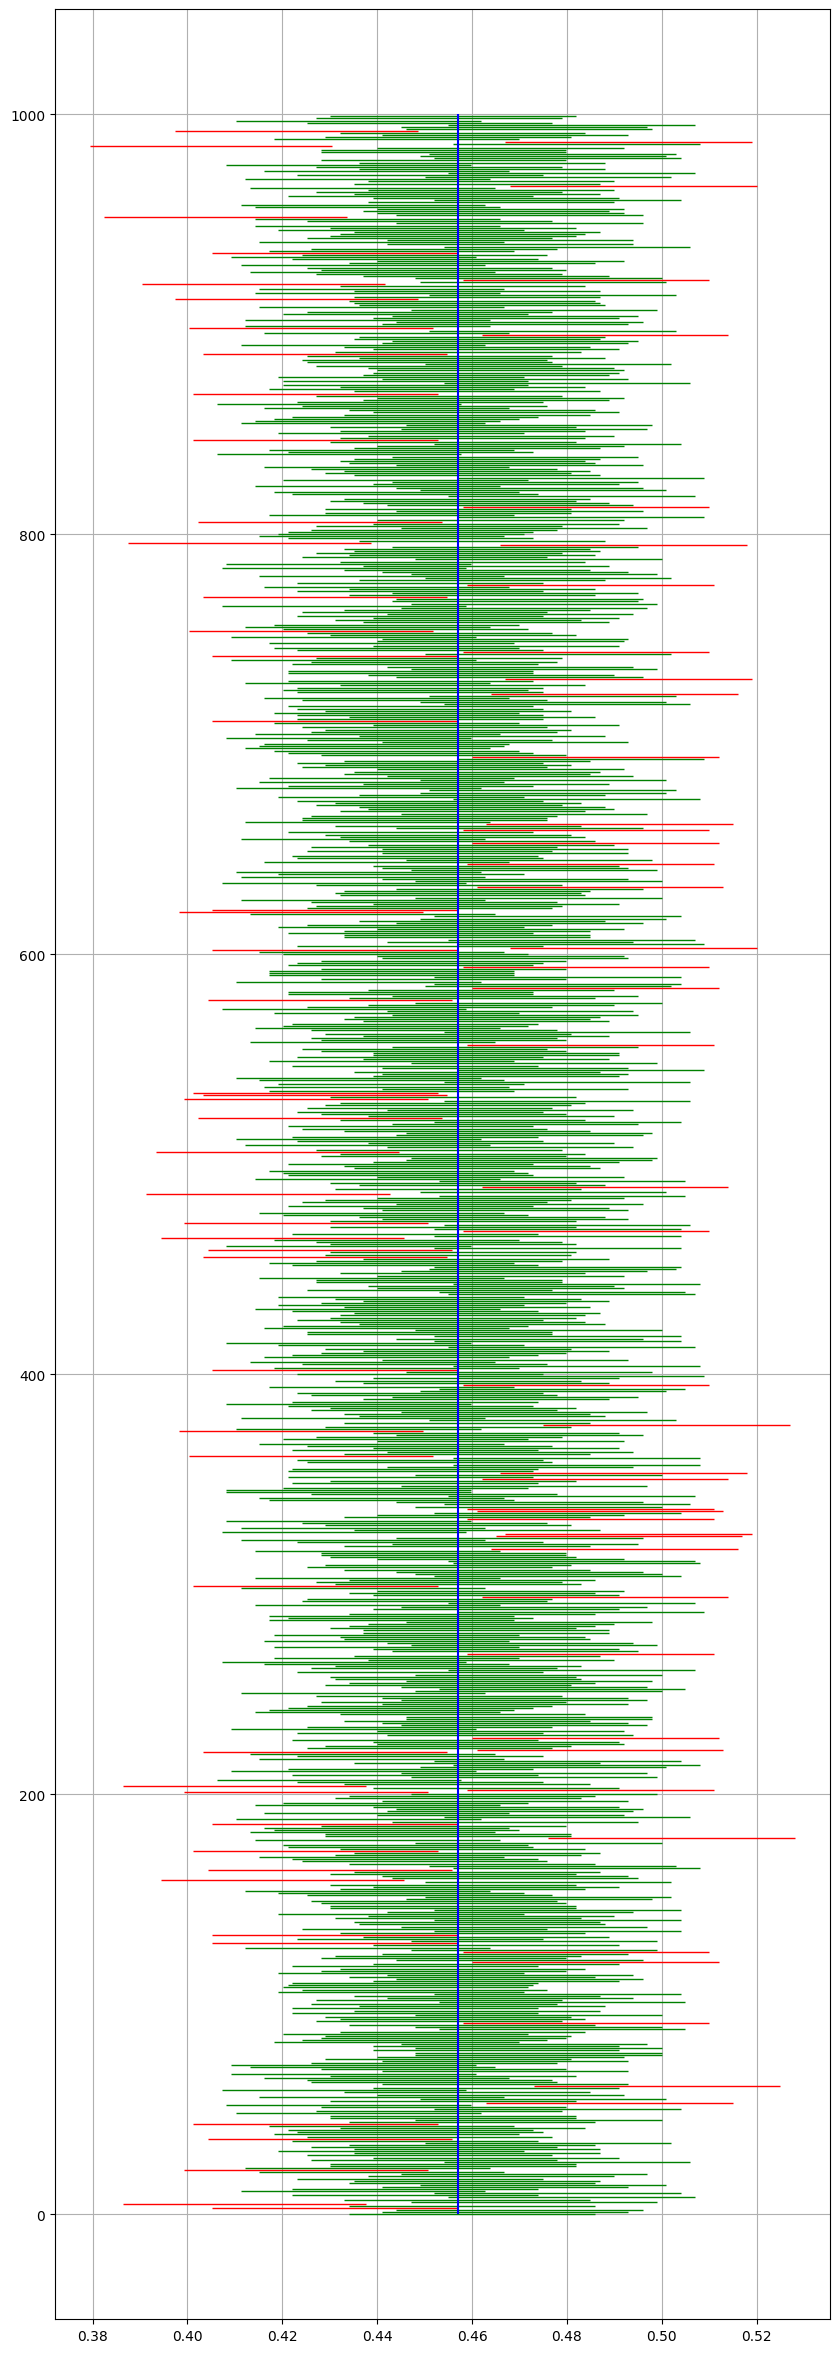

In [77]:
conf_intervals = []
n_sample_confidence_intervals_that_didnt_cover_population_proportion = 0

for props in sample_props:
    conf_intervals.append((props,
                           props - (1.645 * np.sqrt(props * (1 - props) / 1000)),
                           props + (1.645 * np.sqrt(props * (1 - props) / 1000))))

conf_intervals = np.array(conf_intervals)

fig, axes = plt.subplots()
fig.set_size_inches(10, 30)
for (i, cnfd) in enumerate(conf_intervals):
    if (population_prop < cnfd[2]) and (population_prop > cnfd[1]):
        axes.hlines(y = i, xmin = cnfd[1], xmax = cnfd[2], color = "green", linewidth = 1)
    else:
        axes.hlines(y = i, xmin = cnfd[1], xmax = cnfd[2], color = "red", linewidth = 1)
        n_sample_confidence_intervals_that_didnt_cover_population_proportion += 1
axes.vlines(x = population_prop, ymin = 0, ymax = 1000, color = "blue")
axes.grid()
plt.show()

In [79]:
n_sample_confidence_intervals_that_didnt_cover_population_proportion

91

In [80]:
n_sample_confidence_intervals_that_didnt_cover_population_proportion / 1000

0.091

In [81]:
(1000 - n_sample_confidence_intervals_that_didnt_cover_population_proportion) / 1000

0.909

In [84]:
print(f"{(1000 - n_sample_confidence_intervals_that_didnt_cover_population_proportion) / 1000 * 100:.2f} %")

90.90 %


In [86]:
# 98% confidence

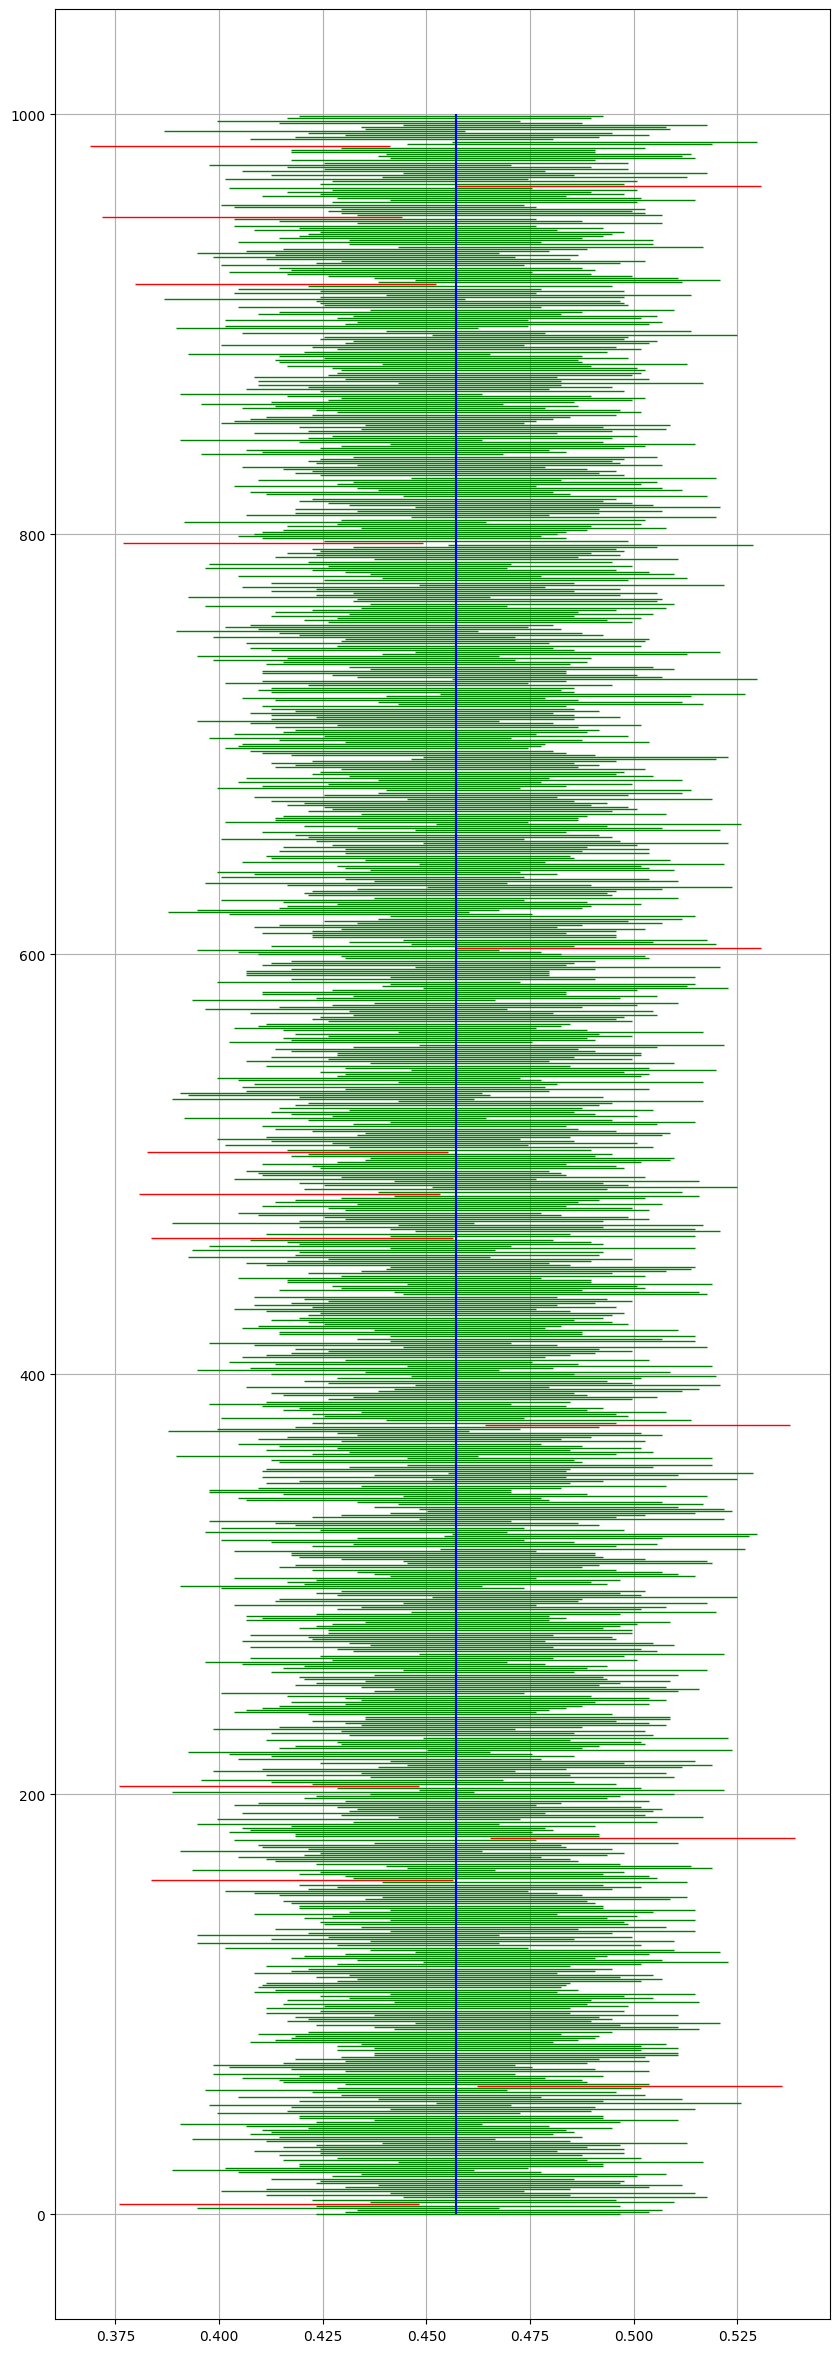

In [90]:
conf_intervals = []
n_sample_confidence_intervals_that_didnt_cover_population_proportion = 0

for props in sample_props:
    conf_intervals.append((props,
                           props - (2.326 * np.sqrt(props * (1 - props) / 1000)),
                           props + (2.326 * np.sqrt(props * (1 - props) / 1000))))

conf_intervals = np.array(conf_intervals)

fig, axes = plt.subplots()
fig.set_size_inches(10, 30)
for (i, cnfd) in enumerate(conf_intervals):
    if (population_prop < cnfd[2]) and (population_prop > cnfd[1]):
        axes.hlines(y = i, xmin = cnfd[1], xmax = cnfd[2], color = "green", linewidth = 1)
    else:
        axes.hlines(y = i, xmin = cnfd[1], xmax = cnfd[2], color = "red", linewidth = 1)
        n_sample_confidence_intervals_that_didnt_cover_population_proportion += 1
axes.vlines(x = population_prop, ymin = 0, ymax = 1000, color = "blue")
axes.grid()
plt.show()

In [91]:
print(f"{(1000 - n_sample_confidence_intervals_that_didnt_cover_population_proportion) / 1000 * 100:.2f} %")

98.50 %


In [89]:
# 99% confidence interval

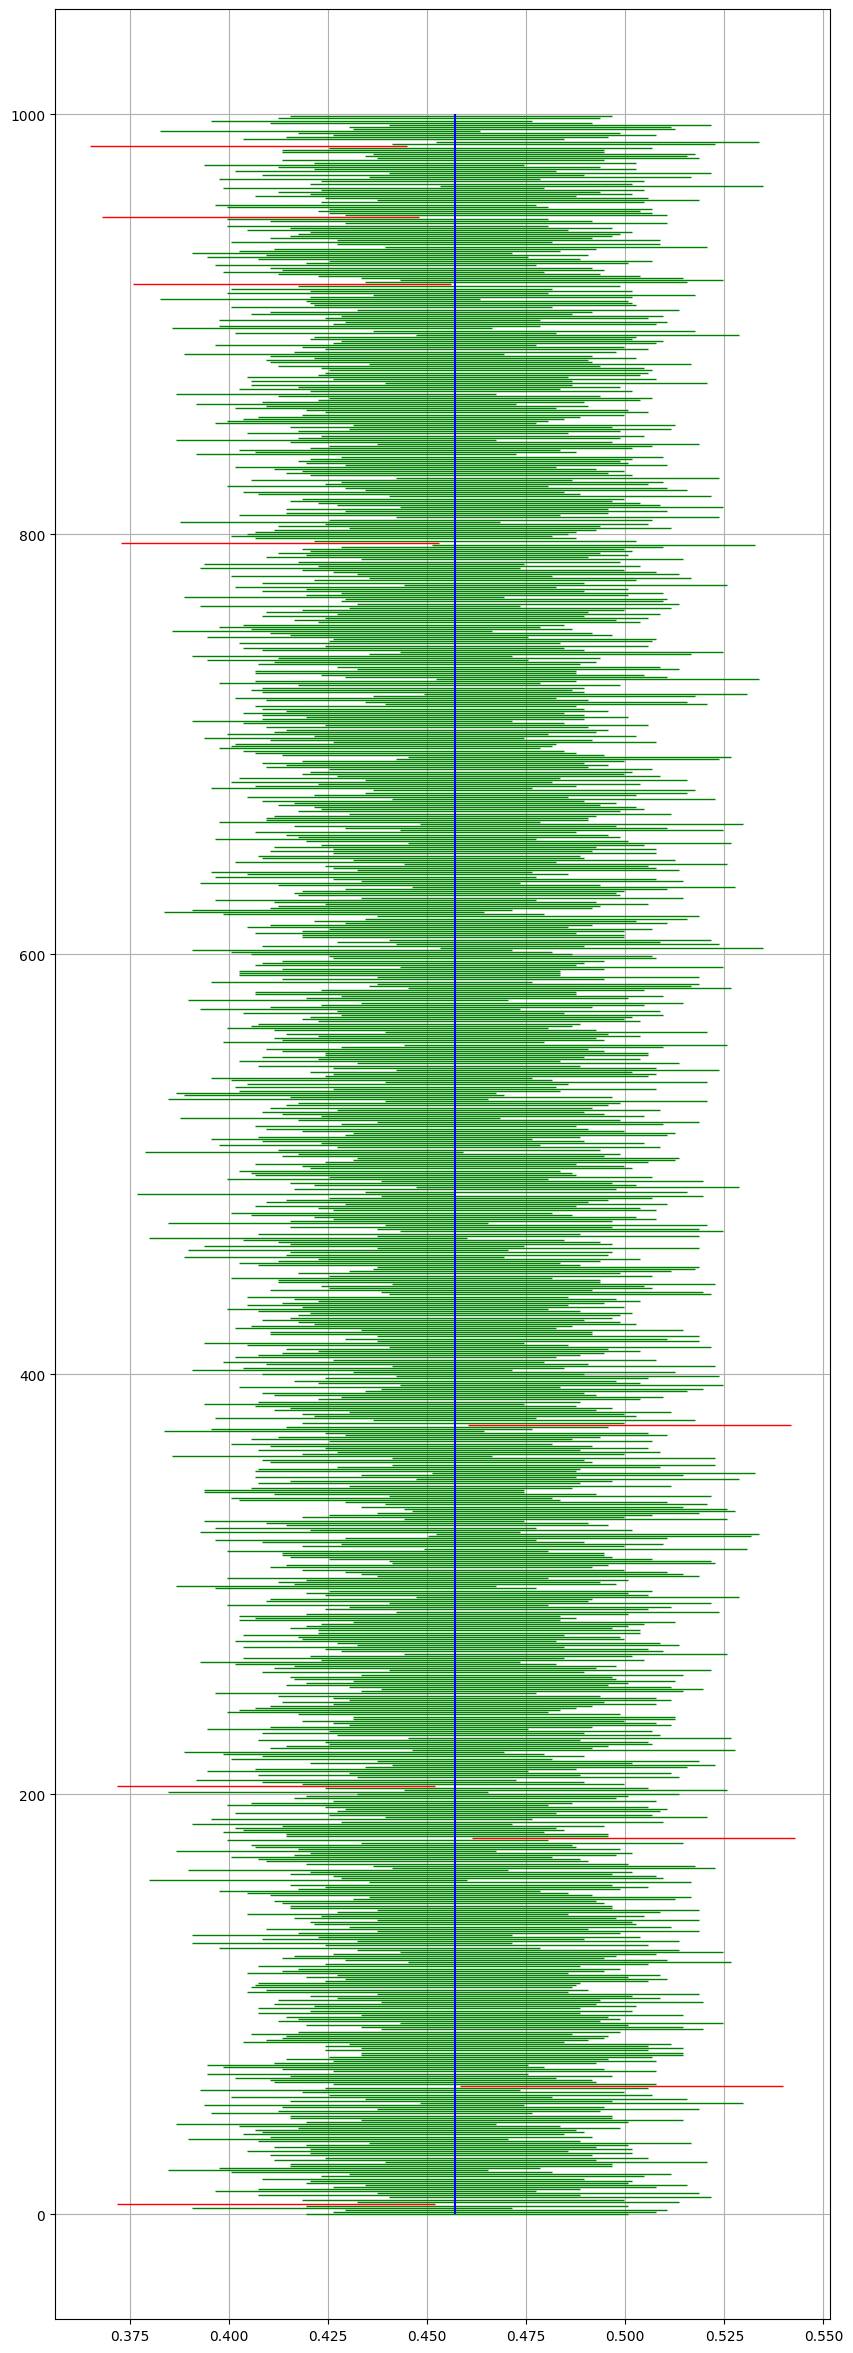

In [92]:
conf_intervals = []
n_sample_confidence_intervals_that_didnt_cover_population_proportion = 0

for props in sample_props:
    conf_intervals.append((props,
                           props - (2.576 * np.sqrt(props * (1 - props) / 1000)),
                           props + (2.576 * np.sqrt(props * (1 - props) / 1000))))

conf_intervals = np.array(conf_intervals)

fig, axes = plt.subplots()
fig.set_size_inches(10, 30)
for (i, cnfd) in enumerate(conf_intervals):
    if (population_prop < cnfd[2]) and (population_prop > cnfd[1]):
        axes.hlines(y = i, xmin = cnfd[1], xmax = cnfd[2], color = "green", linewidth = 1)
    else:
        axes.hlines(y = i, xmin = cnfd[1], xmax = cnfd[2], color = "red", linewidth = 1)
        n_sample_confidence_intervals_that_didnt_cover_population_proportion += 1
axes.vlines(x = population_prop, ymin = 0, ymax = 1000, color = "blue")
axes.grid()
plt.show()

In [93]:
print(f"{(1000 - n_sample_confidence_intervals_that_didnt_cover_population_proportion) / 1000 * 100:.2f} %")

99.10 %


-----------------
# ___Larger multipliers &rarr; Wider intervals &rarr; More confidence___
----------------